In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [12]:
data = {'hours_of_calling_customers': [2, 3, 4, 5, 6, 1.5, 5, 7, 8, 10], 'money_earned':[50, 70, 90, 100, 110, 40, 110, 130, 145, 180]}
df = pd.DataFrame(data)
df

,hours_of_calling_customers,money_earned
0,2.0,50
1,3.0,70
2,4.0,90
3,5.0,100
4,6.0,110
5,1.5,40
6,5.0,110
7,7.0,130
8,8.0,145
9,10.0,180


In [26]:
X = df.drop('money_earned', axis= 1)
y = df['money_earned']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 55)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([116.9895288 ,  53.95287958])

In [28]:
X_test['predictions'] = predictions
X_test

,hours_of_calling_customers,predictions
4,6.0,116.989529
0,2.0,53.952880


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, predictions)
MAE

5.471204188481678

In [46]:
MSE = mean_squared_error(y_test, predictions)
MSE

32.23938488528279

In [48]:
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
RMSE

5.677973660143448

In [58]:
actual_mean = np.mean(y_test)

mae_precentage  = (MAE / actual_mean) * 100
mse_precentage  = (MSE / actual_mean) * 100
rmse_precentage = (RMSE / actual_mean) * 100

print({'mae %': mae_precentage, 'mse %': mse_precentage, 'rmse %': rmse_precentage})

{'mae %': 6.839005235602098, 'mse %': 40.299231106603486, 'rmse %': 7.097467075179311}


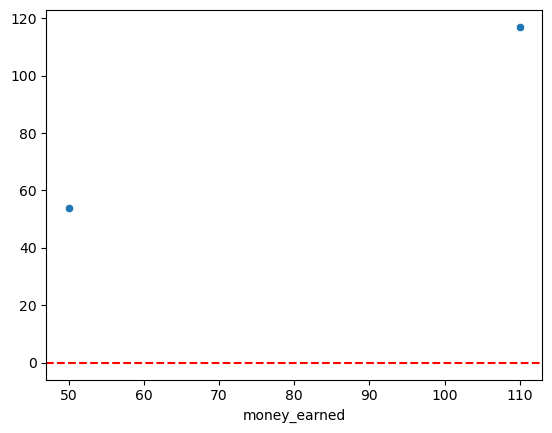

In [72]:
residual = y_test - predictions
sns.scatterplot(x= y_test, y= predictions)
plt.axhline(y= 0, color= 'r', ls= '--')
plt.show()

In [78]:
# I think this is good for linear regression (although there are only 2 points for the test , 0.2 in test)